<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=124936871" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:#800080;color:white;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;">SharkTank US Exploratory Data Analysis (EDA)</p>
## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Apr-07


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 256
-rw-r--r-- 1 nobody nogroup 259652 Apr  7 14:31 'Shark Tank US dataset.csv'

There are 1162 rows and 50 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number Season Start Season End  Episode Number  Pitch Number  \
0              1    09-Aug-09  05-Feb-10               1             1   
1              1    09-Aug-09  05-Feb-10               1             2   
2              1    09-Aug-09  05-Feb-10               1             3   
3              1    09-Aug-09  05-Feb-10               1             4   
4              1    09-Aug-09  05-Feb-10               1             5   

  Original Air Date              Startup Name           Industry  \
0         09-Aug-09            AvaTheElephant    Health/Wellness   
1         09-Aug-09        Mr.Tod'sPieFactory  Food and Beverage   
2         09-Aug-09                   Wispots  Business Services   
3         09-Aug-09  CollegeFoxesPackingBoxes     Lifestyle/Home   
4         09-Aug-09                  IonicEar      Software/Tech   

                              Business Description Pitchers Gender  \
0           Ava The Elephant - Baby and Child Care          Female   
1           Mr. Tod's Pie Factory - Specialty Food            Male   
2                      Wispots - Consumer Services            Male   
3  College Foxes Packing Boxes - Consumer Services            Male   
4                            Ionic Ear - Novelties            Male   

  Pitchers City Pitchers State Pitchers Average Age  \
0       Atlanta             GA                  NaN   
1      Somerset             NJ                  NaN   
2          Cary             NC                  NaN   
3         Tampa             FL                  NaN   
4      St. Paul             MN                  NaN   

            Entrepreneur Names                      Company Website  \
0              Tiffany Krumins       http://www.avatheelephant.com/   
1                   Tod Wilson                  http://whybake.com/   
2               Kevin Flannery              http://www.wispots.com/   
3  Nick Friedman, Omar Soliman  http://collegehunkshaulingjunk.com/   
4               Darrin Johnson                                  NaN   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0           4.15              50000.0   
1                     0.0           4.15             460000.0   
2                     0.0           4.15            1200000.0   
3                     0.0           4.15             250000.0   
4                     0.0           4.15            1000000.0   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0             333333.0       1.0            50000.0   
1                     10.0            4600000.0       1.0           460000.0   
2                     10.0           12000000.0       0.0                NaN   
3                     25.0            1000000.0       0.0                NaN   
4                     15.0            6666667.0       0.0                NaN   

   Total Deal Equity  Deal Valuation  Number of sharks in deal  \
0               55.0         90909.0                       1.0   
1               50.0        920000.0                       2.0   
2                NaN             NaN                       NaN   
3                NaN             NaN                       NaN   
4                NaN             NaN                       NaN   

   Investment Amount Per Shark  Equity Per Shark  Royalty Deal  Loan  \
0                      50000.0              55.0           NaN   NaN   
1                     230000.0              25.0           NaN   NaN   
2                          NaN               NaN           NaN   NaN   
3                          NaN               NaN           NaN   NaN   
4                          NaN               NaN           NaN   NaN   

   Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
0                             50000.0                                55.0   
1                            230000.0                                25.0   
2                                 NaN

In [6]:
shark_tank.tail(10).T

1152  \
Season Number                                                    14   
Season Start                                              23-Sep-22   
Season End                                                      NaN   
Episode Number                                                   16   
Pitch Number                                                   1190   
Original Air Date                                         10-Mar-23   
Startup Name                                                  Pluie   
Industry                                         Children/Education   
Business Description                          Diaper changing table   
Pitchers Gender                                              Female   
Pitchers City                                                   NaN   
Pitchers State                                                  NaN   
Pitchers Average Age                                         Middle   
Entrepreneur Names                  Addie Gundry and Brittany Hizer   
Company Website                                                 NaN   
Multiple Entrepreneurs                                          1.0   
US Viewership                                                  3.59   
Original Ask Amount                                        500000.0   
Original Offered Equity                                         5.0   
Valuation Requested                                      10000000.0   
Got Deal                                                        0.0   
Total Deal Amount                                               NaN   
Total Deal Equity                                               NaN   
Deal Valuation                                                  NaN   
Number of sharks in deal                                        NaN   
Investment Amount Per Shark                                     NaN   
Equity Per Shark                                                NaN   
Royalty Deal                                                    NaN   
Loan                                                            NaN   
Barbara Corcoran Investment Amount                              NaN   
Barbara Corcoran Investment Equity                              NaN   
Mark Cuban Investment Amount                                    NaN   
Mark Cuban Investment Equity                                    NaN   
Lori Greiner Investment Amount                                  NaN   
Lori Greiner Investment Equity                                  NaN   
Robert Herjavec Investment Amount                               NaN   
Robert Herjavec Investment Equity                               NaN   
Daymond John Investment Amount                                  NaN   
Daymond John Investment Equity                                  NaN   
Kevin O Leary Investment Amount                                 NaN   
Kevin O Leary Investment Equity                                 NaN   
Guest Investment Amount                                         NaN   
Guest Investment Equity                                         NaN   
Guest Name                                                      NaN   
Barbara Corcoran Present                                        NaN   
Mark Cuban Present                                              NaN   
Lori Greiner Present                                            NaN   
Robert Herjavec Present                                         NaN   
Daymond John Present                                            NaN   
Kevin O Leary Present                                           NaN   

                                                                        1153  \
Season Number                                                             14   
Season Start                                                       23-Sep-22   
Season End                                                               NaN   
Episode Number                                                            16   
Pitch Number                             

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1162 non-null   Int32  
 1   Season Start                        1162 non-null   object 
 2   Season End                          1091 non-null   object 
 3   Episode Number                      1162 non-null   Int32  
 4   Pitch Number                        1162 non-null   Int32  
 5   Original Air Date                   1158 non-null   object 
 6   Startup Name                        1162 non-null   object 
 7   Industry                            1162 non-null   object 
 8   Business Description                1162 non-null   object 
 9   Pitchers Gender                     1156 non-null   object 
 10  Pitchers City                       498 non-null    object 
 11  Pitchers State                      739 non

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 14
Number of unique values in Season Start - 14
Number of unique values in Season End - 13
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 1162
Number of unique values in Original Air Date - 277
Number of unique values in Startup Name - 1160
Number of unique values in Industry - 16
Number of unique values in Business Description - 1160
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers City - 250
Number of unique values in Pitchers State - 46
Number of unique values in Pitchers Average Age - 4
Number of unique values in Entrepreneur Names - 617
Number of unique values in Company Website - 496
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 208
Number of unique values in Original Ask Amount - 76
Number of unique values in Original Offered Equity - 44
Number of unique values in Valuation Requested - 165
Number of unique value

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

14 seasons 

1199 startup companies came for pitching 



In [13]:
# Season-wise number of episodes
pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')

Season Number    1  2   3   4   5   6   7   8   9  10  11  12  13  14
Episode Number  14  9  15  26  29  29  29  24  24  23  24  14  11  18

In [14]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [15]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

Male          655
Female        293
Mixed Team    208
Name: Pitchers Gender, dtype: int64 

Male          57%
Female        25%
Mixed Team    18%
Name: Pitchers Gender, dtype: object 



<AxesSubplot:title={'center':'Pitchers Gender wise percentage'}, ylabel='Pitchers Gender'>

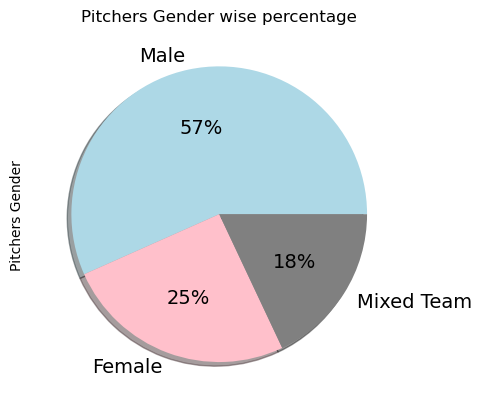

In [16]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Gender wise percentage")
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)

### 💹 59% companies received offers and 41% startups could not convince Sharks to invest

1.0    687
0.0    474
Name: Got Deal, dtype: int64 

1.0    59%
0.0    41%
Name: Got Deal, dtype: object


<AxesSubplot:ylabel='Got Deal'>

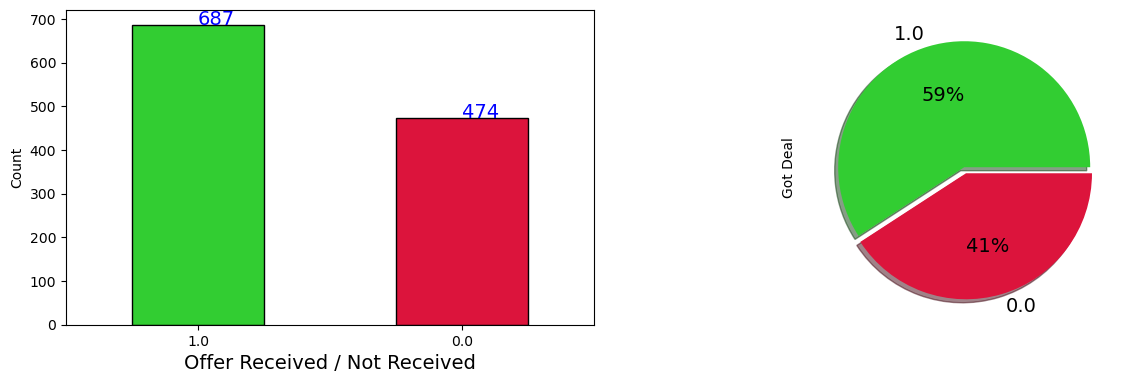

In [17]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Received / Not Received", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)

# 687 companies received offers & 474 startups could not convince #Sharks to invest.

Male          367
Female        183
Mixed Team    133
Name: Pitchers Gender, dtype: int64


<AxesSubplot:ylabel='Pitchers Gender'>

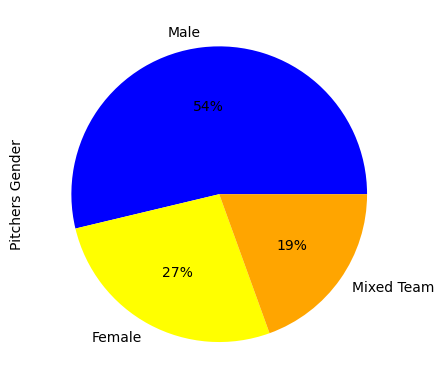

In [18]:
# Gender wise distribution, who received the offer
print(shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts())
shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"])

Male          288
Female        109
Mixed Team     75
Name: Pitchers Gender, dtype: int64


<AxesSubplot:ylabel='Pitchers Gender'>

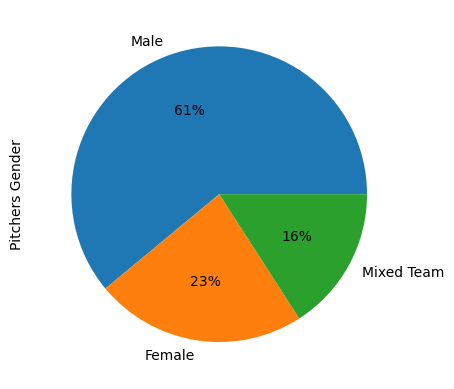

In [19]:
# Gender wise distribution, who could NOT receive the offer
print(shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts())
shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%')

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [20]:
IFrame("https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [21]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [22]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [23]:
# Sum of investment amount asked
print("Sum of investment amount asked, by all startup companies, in Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Shark Tank - $325,438,000


In [24]:
# Amount invested by all sharks
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $196,584,666


In [25]:
# Sum of loan/debt amount
print("Sum of loan/debt amount, given by all sharks, in American Shark Tank -", format_currency(shark_tank['Loan'].sum(), 'USD', locale='en_US').replace(".00", ""))
# Incomplete data

Sum of loan/debt amount, given by all sharks, in American Shark Tank - $2,325,037


In [26]:
# # Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in M'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in M', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in M', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in M'].map(float).map(str))
fig.show()

Startup Name
AirCar                     5000000.0
MokiDoorstep               3000000.0
SynDaverLabs               3000000.0
Zipz                       2500000.0
Fizzics                    2000000.0
TenThirtyOneProductions    2000000.0
Vengo                      2000000.0
RuggedManiac               1750000.0
BeyondSushi                1500000.0
Sworkit                    1500000.0
XCraft                     1500000.0
Trunkster                  1400000.0
HyConn                     1250000.0
Jackson'sHonest            1250000.0
TheRedDressBoutique        1200000.0
Name: Total Deal Amount, dtype: float64


In [27]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
Legacy Shave             95.0
GrooveBook               80.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
TheLastLid               60.0
TreasureChestPets        60.0
CordaRoy's               58.0
Name: Total Deal Equity, dtype: float64


In [28]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] >= 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who got debt/loan amount 46 



Season Number               Startup Name  Original Ask Amount  \
272               5           RapidRamenCooker             300000.0   
289               5                 BetterLife             400000.0   
291               5         PaparazziProposals             250000.0   
299               5                 Grace&Lace             175000.0   
300               5                       Yubo             150000.0   
433               6      Scratch&GrainBakingCo             150000.0   
459               6                   CocoJack             125000.0   
520               7              SavvyNaturals             200000.0   
563               7                    Sworkit            1500000.0   
571               7                 BetterBack             750000.0   
580               7                      Vengo            2000000.0   
586               7                    Coolbox             500000.0   
621               8                     TekDry             500000.0   
622               8             NightRunner270             250000.0   
636               8                  StyleClub             500000.0   
640               8  Jack'sStands&Marketplaces              50000.0   
642               8                       Toor             500000.0   
647               8                    Inboard             750000.0   
651               8              SealedbySanta             150000.0   
670               8              DBestProducts             350000.0   
684               8       BlentiqueWineCompany             250000.0   
686               8                   Rareform             300000.0   
703               8                Wine&Design             500000.0   
733               9                   WaiveCar             500000.0   
753               9                 EverlyWell            1000000.0   
754               9                       Mush             300000.0   
759               9                    Frywall             100000.0   
764               9                    Stasher             400000.0   
791               9               GunnarOptiks             750000.0   
845              10           MakeupJunkieBags             200000.0   
899              11                BoostOxygen            1000000.0   
924              11                      Outer             750000.0   
931              11                 Flexscreen             800000.0   
955              11                     Bohana             200000.0   
956              11                       Boho             300000.0   
959              11                      Goumi            1000000.0   
974              11               MuralPainter             300000.0   
1023             12                    Electra             350000.0   
1027             12             Slice of Sauce             200000.0   
1029             12                 Luna Magic             200000.0   
1031             12                     Quevos             200000.0   
1045             12              Byoot Company              50000.0   
1077             13               The Real Elf             125000.0   
1112             14               Collars & Co             300000.0   
1160             14                      Bleni             250000.0   
1161             14         TheIceCreamCanteen             100000.0   

      Total Deal Amount  Total Deal Equity  
272            300000.0              15.00  
289            400000.0              17.00  
291            250000.0              33.00  
299            175000.0              10.00  
300            150000.0              20.00  
433            150000.0              20.00  
459            125000.0              25.00  
520            200000.0              40.00  
563           1500000.0              10.00  
571            750000.0               7.50  
580           2000000.0              10.00  
586            500000.0              15.00  
621            500000.0               5.00  
622            200000.0              1

In [29]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 63 



Season Number             Startup Name  Original Ask Amount  \
6                 1            ClassroomJams             250000.0   
10                1              TurboBaster              35000.0   
26                1              ElementBars             150000.0   
69                2  FirstDefenseNasalScreen             500000.0   
72                2          ModMomFurniture              90000.0   
...             ...                      ...                  ...   
1122             14                  ChessUp             300000.0   
1127             14               Jica Foods             300000.0   
1132             14               WildWonder             500000.0   
1133             14           Cabinet Health             500000.0   
1147             14     Big Mouth Toothbrush             150000.0   

      Total Deal Amount  Total Deal Equity  
6              250000.0              100.0  
10              35000.0              100.0  
26             150000.0               30.0  
69             750000.0               30.0  
72              90000.0               33.0  
...                 ...                ...  
1122           300000.0                5.0  
1127           300000.0                6.0  
1132           500000.0                6.0  
1133           500000.0                7.0  
1147           150000.0               20.0  

[63 rows x 5 columns]

In [30]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (USD) and Number times asked

Original Ask Amount
100000.0    145
200000.0    124
150000.0    119
500000.0    115
250000.0    101
300000.0     84
50000.0      83
75000.0      44
400000.0     43
125000.0     29
dtype: int64

In [31]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
10.0    364
20.0    214
5.0     152
15.0    146
25.0     70
30.0     32
8.0      28
7.0      15
12.0     14
2.5      12
dtype: int64

In [32]:
# Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (USD) and Number times invested

Total Deal Amount
100000.0    89
200000.0    80
150000.0    71
500000.0    62
250000.0    61
300000.0    59
50000.0     41
75000.0     28
400000.0    21
600000.0    14
dtype: int64

In [33]:
# Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
20.0    112
25.0    109
10.0     64
30.0     64
15.0     59
40.0     34
50.0     33
5.0      23
33.0     23
35.0     21
dtype: int64

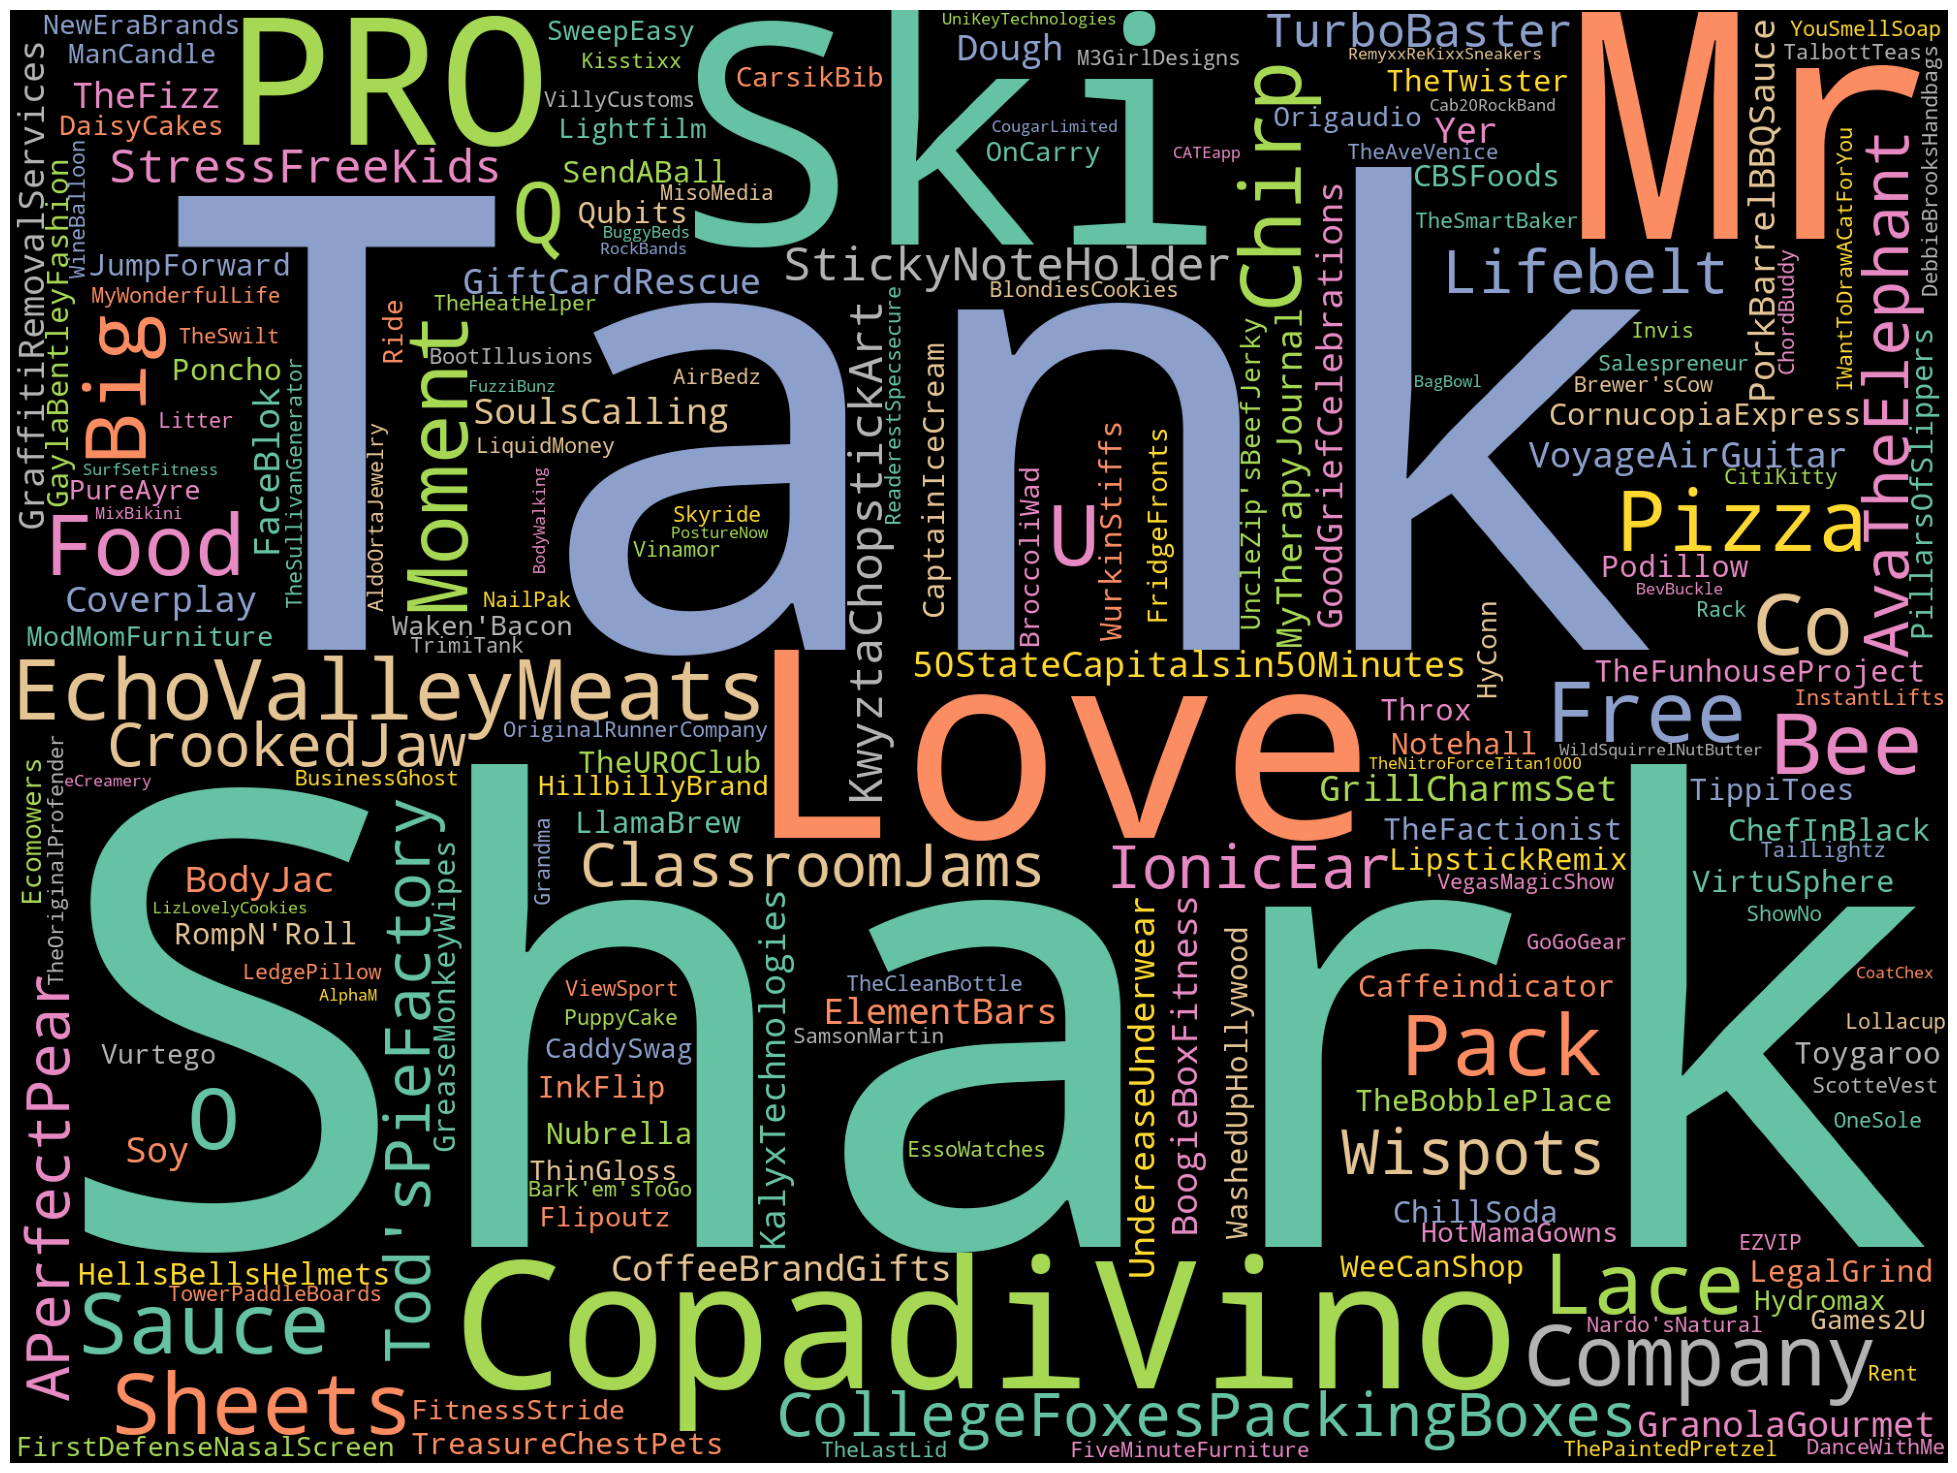

In [34]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 💰 Which shark invested most ?

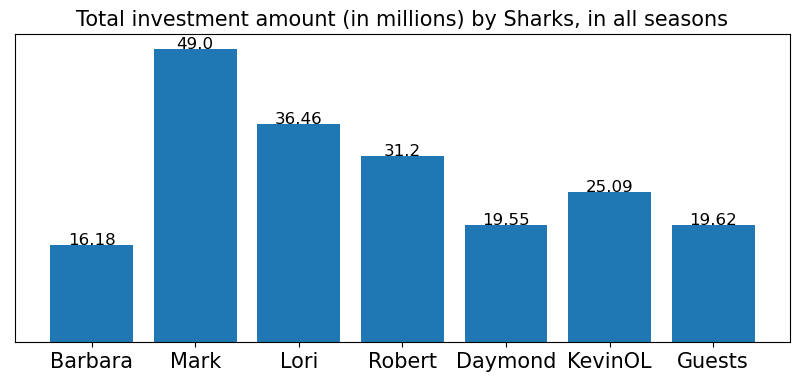

In [35]:
# Amount Invested by sharks
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

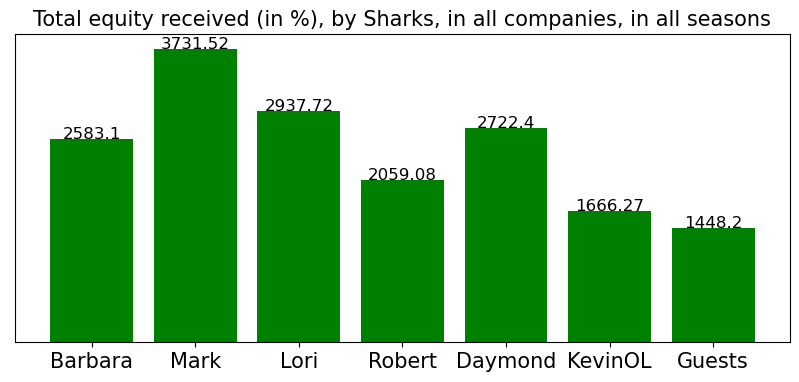

In [36]:
# Equity received by sharks
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

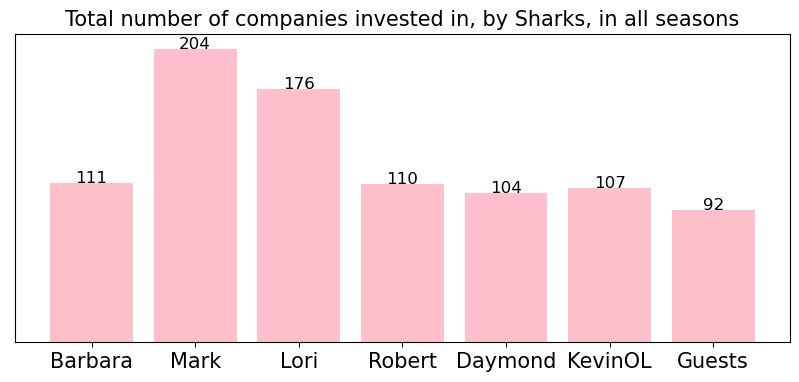

In [37]:
# Number of companies invested
Amount = [(shark_tank['Barbara Corcoran Investment Amount']).count(), (shark_tank['Mark Cuban Investment Amount']).count(), (shark_tank['Lori Greiner Investment Amount']).count(), (shark_tank['Robert Herjavec Investment Amount']).count(),
    (shark_tank['Daymond John Investment Amount']).count(), (shark_tank['Kevin O Leary Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Sharks, in all seasons", fontsize=15)
plt.show()

In [38]:
# Top 5, guests sharks who invested in most number of companies
shark_tank.groupby('Guest Name').size().nlargest(5)

Guest Name
Chris Sacca         40
Rohan Oza           30
Sara Blakely        20
Alex Rodriguez      18
Bethenny Frankel    12
dtype: int64

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

1.0    508
2.0    155
3.0     16
5.0      5
4.0      3
Name: Number of sharks in deal, dtype: int64 

1.0    74%
2.0    23%
3.0     2%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


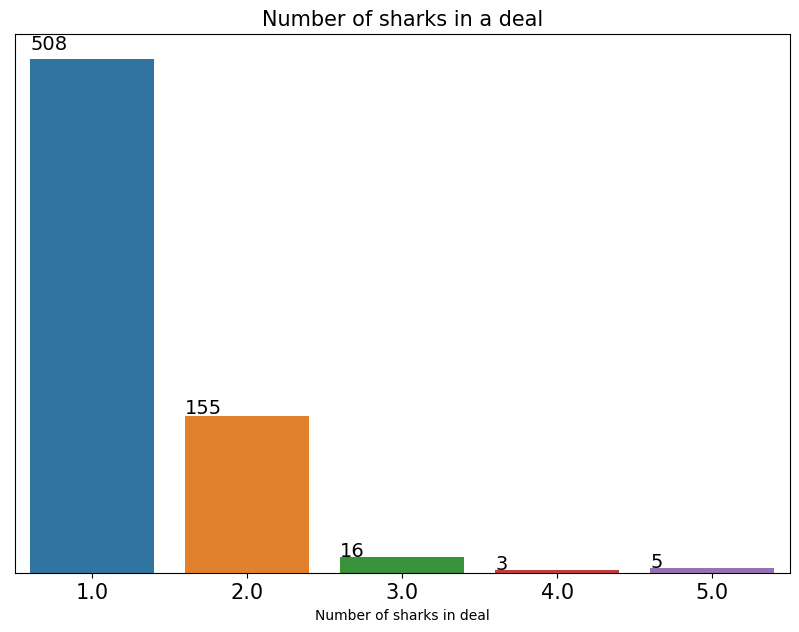

In [39]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in a deal", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [40]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                1  ClassroomJams           250000.0              100.0
161              4      BuggyBeds           250000.0               25.0
268              5   Breathometer          1000000.0               30.0
514              7         XCraft          1500000.0               25.0
814             10    CupBoardPro           100000.0               20.0


In [41]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Mark did more solo deals, than any other Shark

Mark Cuban Investment Amount      103
Lori Greiner Investment Amount     94
Daymond John Investment Amount     73
dtype: int64

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 111
Investment amount by Barbara Corcoran $16,177,500
Equity received by Barbara Corcoran 2583.1 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet

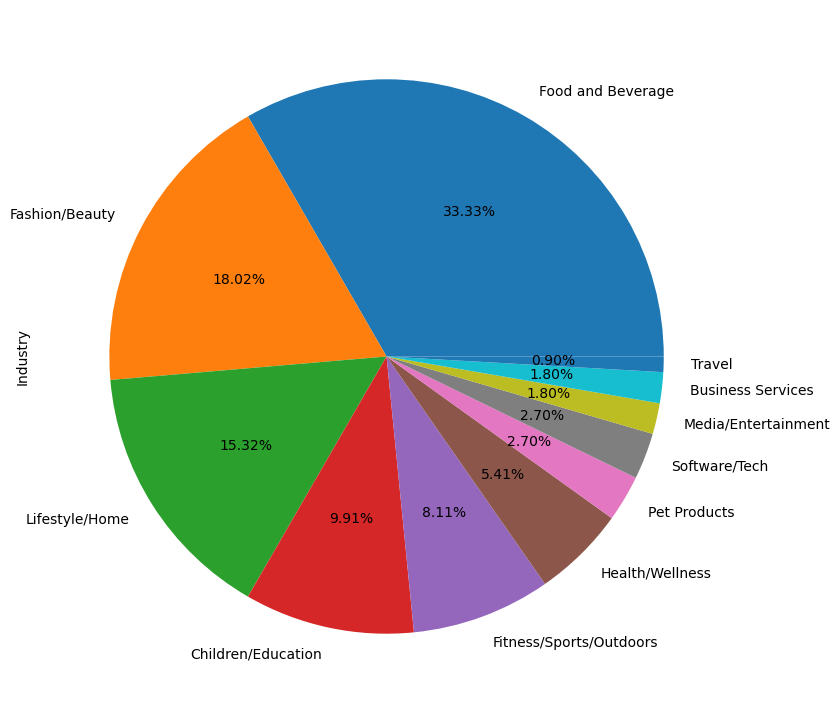

In [42]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-3:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Barbara Corcoran Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 204
Investment amount by Mark Cuban $49,000,000
Equity received by Mark Cuban 3731.52 % in different companies

Company details:
---------------------------------------------------------------------------
             Startup Name                Industry  Mark Cuban Investment Amount
            ClassroomJams      Children/Education                  5.000000e+04
                TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                 Toygaroo      Children/Education                  1.000000e+05
  FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                   HyConn         Uncertain/Other                  1.250000e+06
                    EZVIP     Media/Entertainment                  7.500000e+04
           TheCleanBottle       Food and Beverage                  6.000000e+04
    IWantToDrawACatForYou           Software/Tech                  2.500000e+04
              WineBalloon       Food and Be

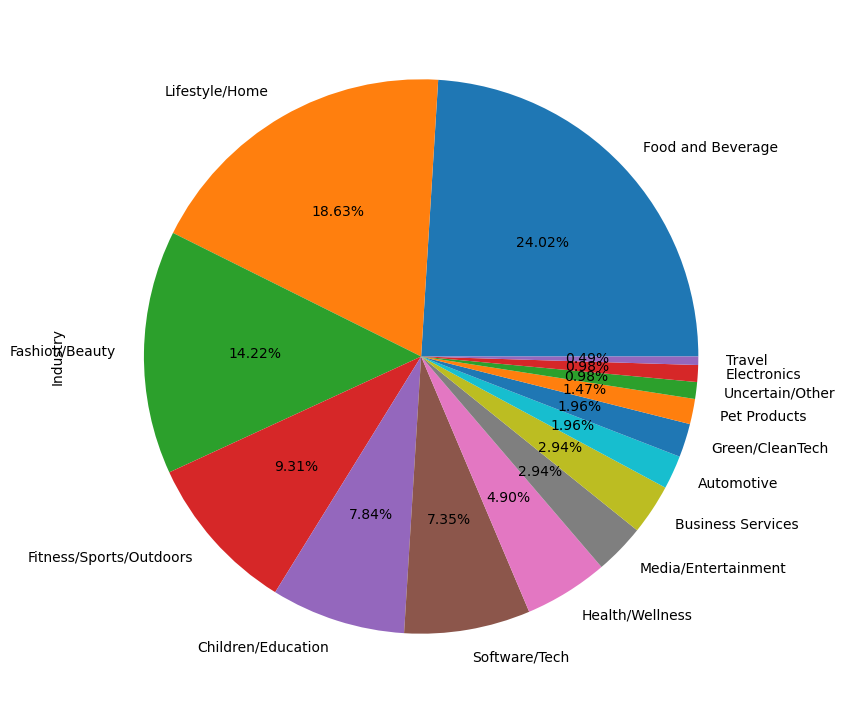

In [43]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-3:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Mark Cuban Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ✳️ Lori Greiner's Investments

Total investments by Lori Greiner 176
Investment amount by Lori Greiner $36,455,000
Equity received by Lori Greiner 2937.72 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Lori Greiner Investment Amount
                ShowNo          Fashion/Beauty                     75000.00000
         M3GirlDesigns          Fashion/Beauty                    100000.00000
   ReaderestSpecsecure          Lifestyle/Home                    150000.00000
               NailPak          Fashion/Beauty                     50000.00000
               BagBowl          Lifestyle/Home                     40000.00000
             Back9Dips       Food and Beverage                     75000.00000
            MarzSprays         Health/Wellness                    200000.00000
            ScrubDaddy          Lifestyle/Home                    200000.00000
          TheCoolWazoo      Children/Education

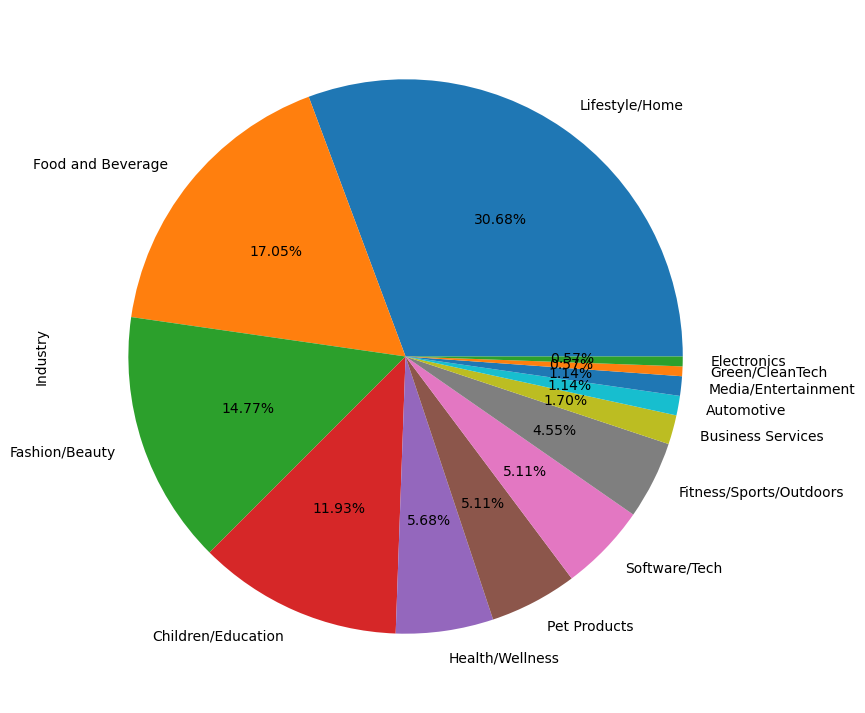

In [44]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-3:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Lori Greiner Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🚀 Robert Herjavec's Investments

Total investments by Robert Herjavec 110
Investment amount by Robert Herjavec $31,197,332.67
Equity received by Robert Herjavec 2059.08 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Robert Herjavec Investment Amount
           APerfectPear       Food and Beverage                       2.500000e+05
          ClassroomJams      Children/Education                       5.000000e+04
         GiftCardRescue           Software/Tech                       1.000000e+05
       MyTherapyJournal         Health/Wellness                       4.000000e+04
          Soy-Yer-Dough       Food and Beverage                       1.000000e+05
         GrillCharmsSet          Fashion/Beauty                       5.000000e+04
            JumpForward      Children/Education                       3.000000e+05
      GreaseMonkeyWipes          Lifestyle/Home                       2.000000e+0

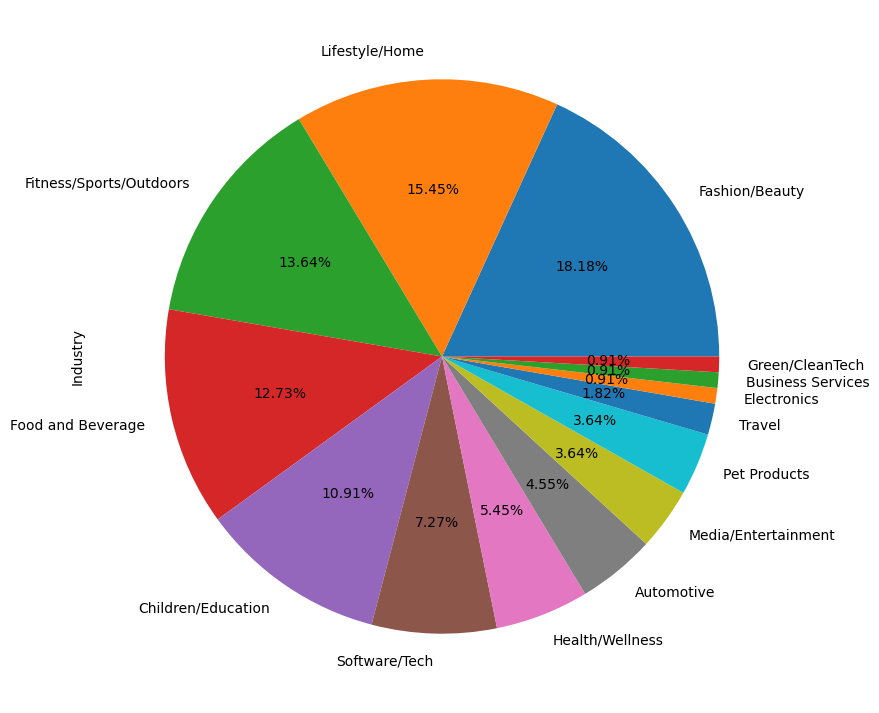

In [45]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-3:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Robert Herjavec Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎾 Daymond John's Investments

Total investments by Daymond John 104
Investment amount by Daymond John $19,546,500
Equity received by Daymond John 2722.4 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
         Mr.Tod'sPieFactory       Food and Beverage                        230000.0
              ClassroomJams      Children/Education                         50000.0
              Soy-Yer-Dough       Food and Beverage                        100000.0
          TreasureChestPets            Pet Products                         50000.0
        GaylaBentleyFashion          Fashion/Beauty                        125000.0
          HellsBellsHelmets Fitness/Sports/Outdoors                        500000.0
              LipstickRemix          Fashion/Beauty                         52500.0
                   Nubrella          Fashion/Beauty                        200000.0
  

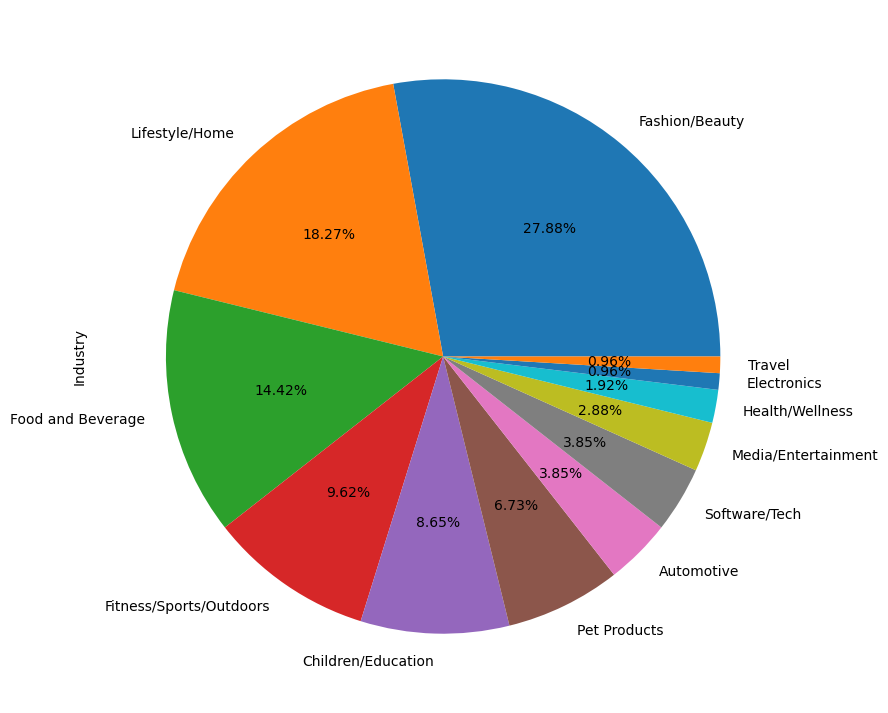

In [46]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-3:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Daymond John Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ⭐ Kevin O Leary's Investments

Total investments by Kevin O Leary 107
Investment amount by Kevin O Leary $25,092,500
Equity received by Kevin O Leary 1666.27 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Kevin O Leary Investment Amount
          APerfectPear       Food and Beverage                     2.500000e+05
         ClassroomJams      Children/Education                     5.000000e+04
        GiftCardRescue           Software/Tech                     1.000000e+05
      MyTherapyJournal         Health/Wellness                     4.000000e+04
         Soy-Yer-Dough       Food and Beverage                     1.000000e+05
           JumpForward      Children/Education                     3.000000e+05
              Toygaroo      Children/Education                     1.000000e+05
          FridgeFronts          Lifestyle/Home                     5.000000e+04
           TalbottTeas       Food 

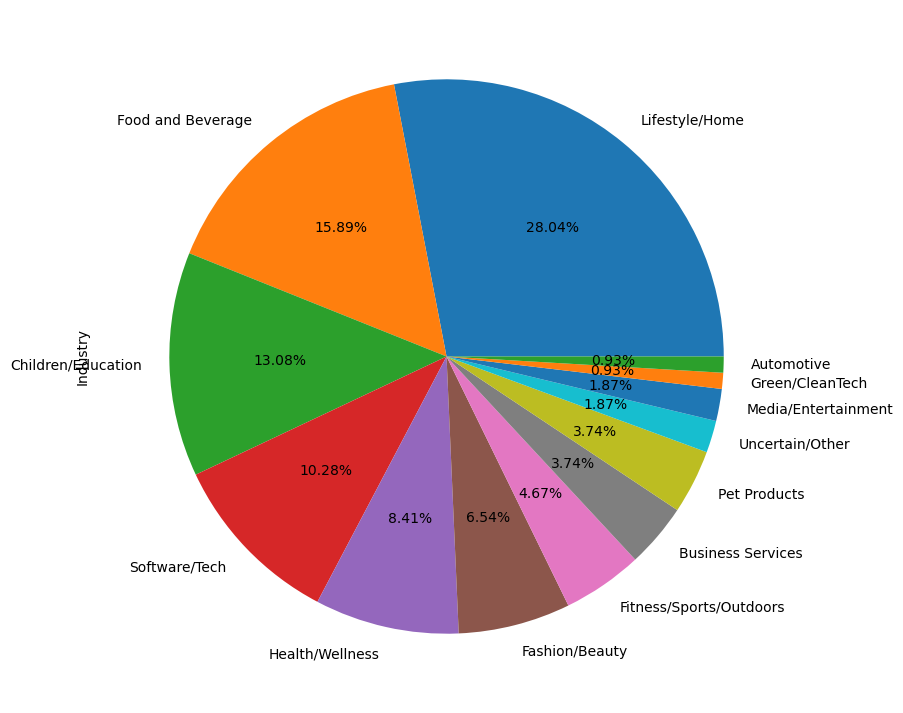

In [47]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-3:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Kevin O Leary Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 Guest's Investments

Total investments by all Guests 91
Investment amount by all Guests $19,615,833.33
Equity received by all Guests 1448.2 % in different companies

Company details:
---------------------------------------------------------------------------
             Startup Name                Industry  Guest Investment Amount
              TurboBaster       Food and Beverage             3.500000e+04
              ElementBars Fitness/Sports/Outdoors             1.500000e+05
               TheUROClub Fitness/Sports/Outdoors             2.500000e+04
           Caffeindicator       Food and Beverage             2.000000e+05
                 Hydromax Fitness/Sports/Outdoors             5.000000e+04
                CitiKitty            Pet Products             1.000000e+05
               Tree-T-Pee         Green/CleanTech             1.500000e+05
       TheCookieDoughCafe       Food and Beverage             5.000000e+04
              KitchenSafe       Food and Beverage             5.000000e+04
            

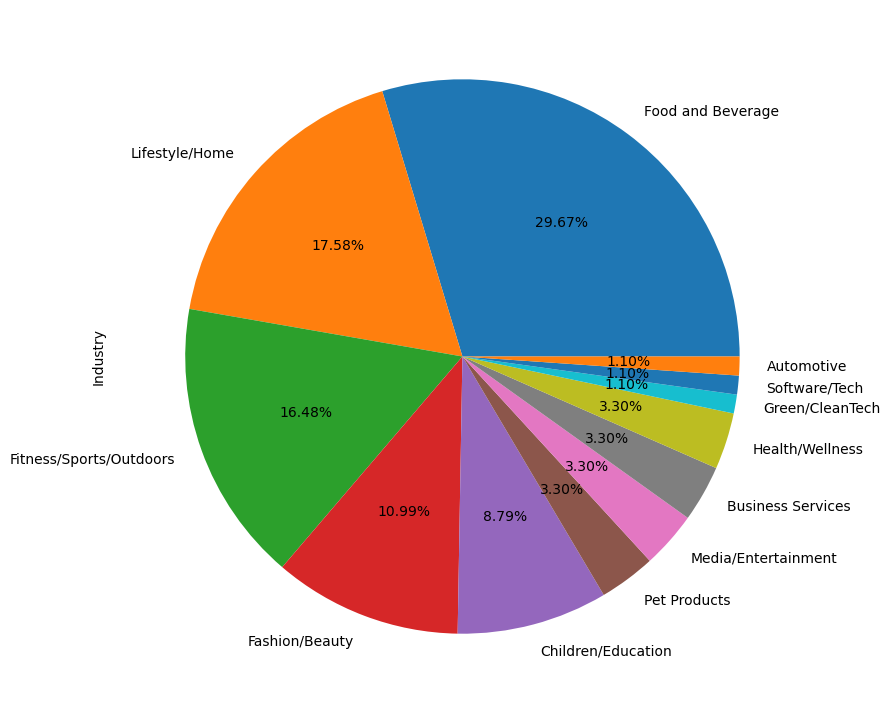

In [48]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

In [49]:
# tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
# fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=800, height=800, color="Guest Investment Equity")
# fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
# fig.update_traces(textposition='middle center')
# fig.show()

In [50]:
# Top 25 US 🇺🇸 states of pitcher's
tmp = shark_tank['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers State", title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [51]:
# Top 20 cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers City", title="<b>Top 20 cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [52]:
# Many (100+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Season Number    Startup Name  Original Ask Amount  Total Deal Amount
15                1  GiftCardRescue             150000.0           200000.0
30                1   Soy-Yer-Dough             125000.0           300000.0
43                1     JumpForward             150000.0           600000.0
64                2    WurkinStiffs              85000.0           100000.0
65                2       TippiToes              30000.0           100000.0
...             ...             ...                  ...                ...
1072             13    Pink Picasso             400000.0           500000.0
1092             14       Oogiebear             400000.0           600000.0
1097             14      TheWoobles             250000.0           450000.0
1113             14          Wondry             185000.0           225000.0
1116             14    Legacy Shave             300000.0           700000.0

[112 rows x 4 columns]

In [53]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number        Startup Name  Original Offered Equity  \
0                 1      AvaTheElephant                     15.0   
1                 1  Mr.Tod'sPieFactory                     10.0   
5                 1        APerfectPear                     15.0   
6                 1       ClassroomJams                     10.0   
10                1         TurboBaster                     35.0   
...             ...                 ...                      ...   
1154             14        Crispy Cones                     10.0   
1156             14     Tngnt Ski Bikes                     20.0   
1159             14             Lavabox                     10.0   
1160             14               Bleni                      6.0   
1161             14  TheIceCreamCanteen                      5.0   

      Total Deal Equity  
0                  55.0  
1                  50.0  
5                  50.0  
6                 100.0  
10                100.0  
...                 ...  
1154               20.0  
1156               40.0  
1159               12.5  
1160               35.0  
1161               20.0  

[580 rows x 4 columns]

In [54]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number       Startup Name  Valuation Requested  Deal Valuation
51                1  GreaseMonkeyWipes             100000.0        100000.0
60                1             Qubits             176471.0        176471.0
78                2    Ride-OnCarry-On             200000.0        200000.0
85                2         DaisyCakes             200000.0        200000.0
92                2             HyConn            1250000.0       1250000.0
...             ...                ...                  ...             ...
1061             13             SoaPen            1000000.0       1000000.0
1087             13            VaBroom           14000000.0      14000000.0
1102             14              Woosh            5000000.0       5000000.0
1120             14         ShredSkinz             300000.0        300000.0
1122             14            ChessUp            6000000.0       6000000.0

[96 rows x 4 columns]

In [55]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number              Startup Name  Valuation Requested  \
30                1             Soy-Yer-Dough             500000.0   
31                1            GrillCharmsSet             200000.0   
77                2            HillbillyBrand             200000.0   
84                2                 SweepEasy             160000.0   
104               3     IWantToDrawACatForYou              40000.0   
112               3               WineBalloon             133333.0   
113               3                    ShowNo             200000.0   
149               3             BootIllusions             333333.0   
232               4              Lose12Inches             480000.0   
268               5              Breathometer            2500000.0   
276               5                 Hamboards             666667.0   
285               5                  FiberFix             900000.0   
323               5        TheCookieDoughCafe             250000.0   
324               5                Cycloramic            1800000.0   
336               5                RevoLights            1500000.0   
400               6          BeatBoxBeverages            2000000.0   
436               6                     Lumio            3125000.0   
444               6               DrainStrain             733333.0   
491               6                SharkWheel            2000000.0   
502               7                  Loliware            1500000.0   
514               7                    XCraft            2500000.0   
517               7               Windcatcher            2500000.0   
580               7                     Vengo           16000000.0   
582               7                Wondercide           10000000.0   
654               8             HandOutGloves             750000.0   
671               8                 Tranquilo            1000000.0   
675               8                   Toymail           10000000.0   
721               9                 IceShaker             666667.0   
744               9                 DNASimple             800000.0   
775               9                RounderBum            1500000.0   
788               9                   Radiate             250000.0   
829              10                  OatMeals            2500000.0   
831              10                  PopItPal            2500000.0   
845              10          MakeupJunkieBags            1333333.0   
852              10                   SubSafe             384615.0   
912              11                  MyoStorm            1500000.0   
925              11  Mrs.Goldfarb'sUnrealDeli            1000000.0   
935              11             KreylEssence            4000000.0   
1045             12             Byoot Company             166667.0   
1097             14                TheWoobles            5000000.0   

      Deal Valuation  
30          588235.0  
31          250000.0  
77          300000.0  
84          227273.0  
104          75758.0  
112         400000.0  
113         300000.0  
149        1250000.0  
232         500000.0  
268        3333333.0  
276        1000000.0  
285        2083333.0  
323         333333.0  
324        3333333.0  
336        3000000.0  
400        3030303.0  
436        3500000.0  
444        1100000.0  
491        3000000.0  
502        2400000.0  
514        6000000.0  
517        4000000.0  
580       20000000.0  
582       16666667.0  
654        1200000.0  
671        1333333.0  
675       12000000.0  
721        1000000.0  
744        1333333.0  
775        3000000.0  
788         400000.0  
829       15000000.0  
831        5000000.0  
845        4000000.0  
852         400000.0  
912        3000000.0  
925        1250000.0  
935        8000000.0  
1045       1000000.0  
1097       7500000.0

In [56]:
# Episodes which got most TRP
print("Maximum viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership",ascending=False).to_string(index=False))

Maximum viewership in US: 8.64 

 Season Number  Episode Number    Startup Name  US Viewership
             6              15        TurboPUP           8.64
             6              15           Lumio           8.64
             6              15      BelloVerde           8.64
             6              15         Napwell           8.64
             6              20        LuminAid           8.43
             6              20         Scholly           8.43
             6              20        KeenHome           8.43
             6              20    TaalumaTotes           8.43
             5              27       Angellift           8.33
             5              27        HangEase           8.33
             5              27 TheBouqsCompany           8.33
             5              27      SustyParty           8.33
             5              21   PackbackBooks           8.29
             5              21          Chapul           8.29
             5              21  Garag

In [57]:
# Episodes which got least TRP
print("Minimum viewership in United States:", shark_tank['US Viewership'].min(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']<=shark_tank['US Viewership'].min()+0.3][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership").to_string(index=False))

Minimum viewership in United States: 2.27 

 Season Number  Episode Number    Startup Name  US Viewership
            11              23          Salted           2.27
            11              23       MCSquares           2.27
            11              23           Slate           2.27
            11              23     RescueReady           2.27
            12               4      JadaSpices           2.31
            12               4    SurpriseCake           2.31
            12               4 TheMightyCarver           2.31
            12               4        Flipstik           2.31
            11              21          Proven           2.39
            11              21         Tanoshi           2.39
            11              21      UnbuckleMe           2.39
            11              21     VanRobotics           2.39


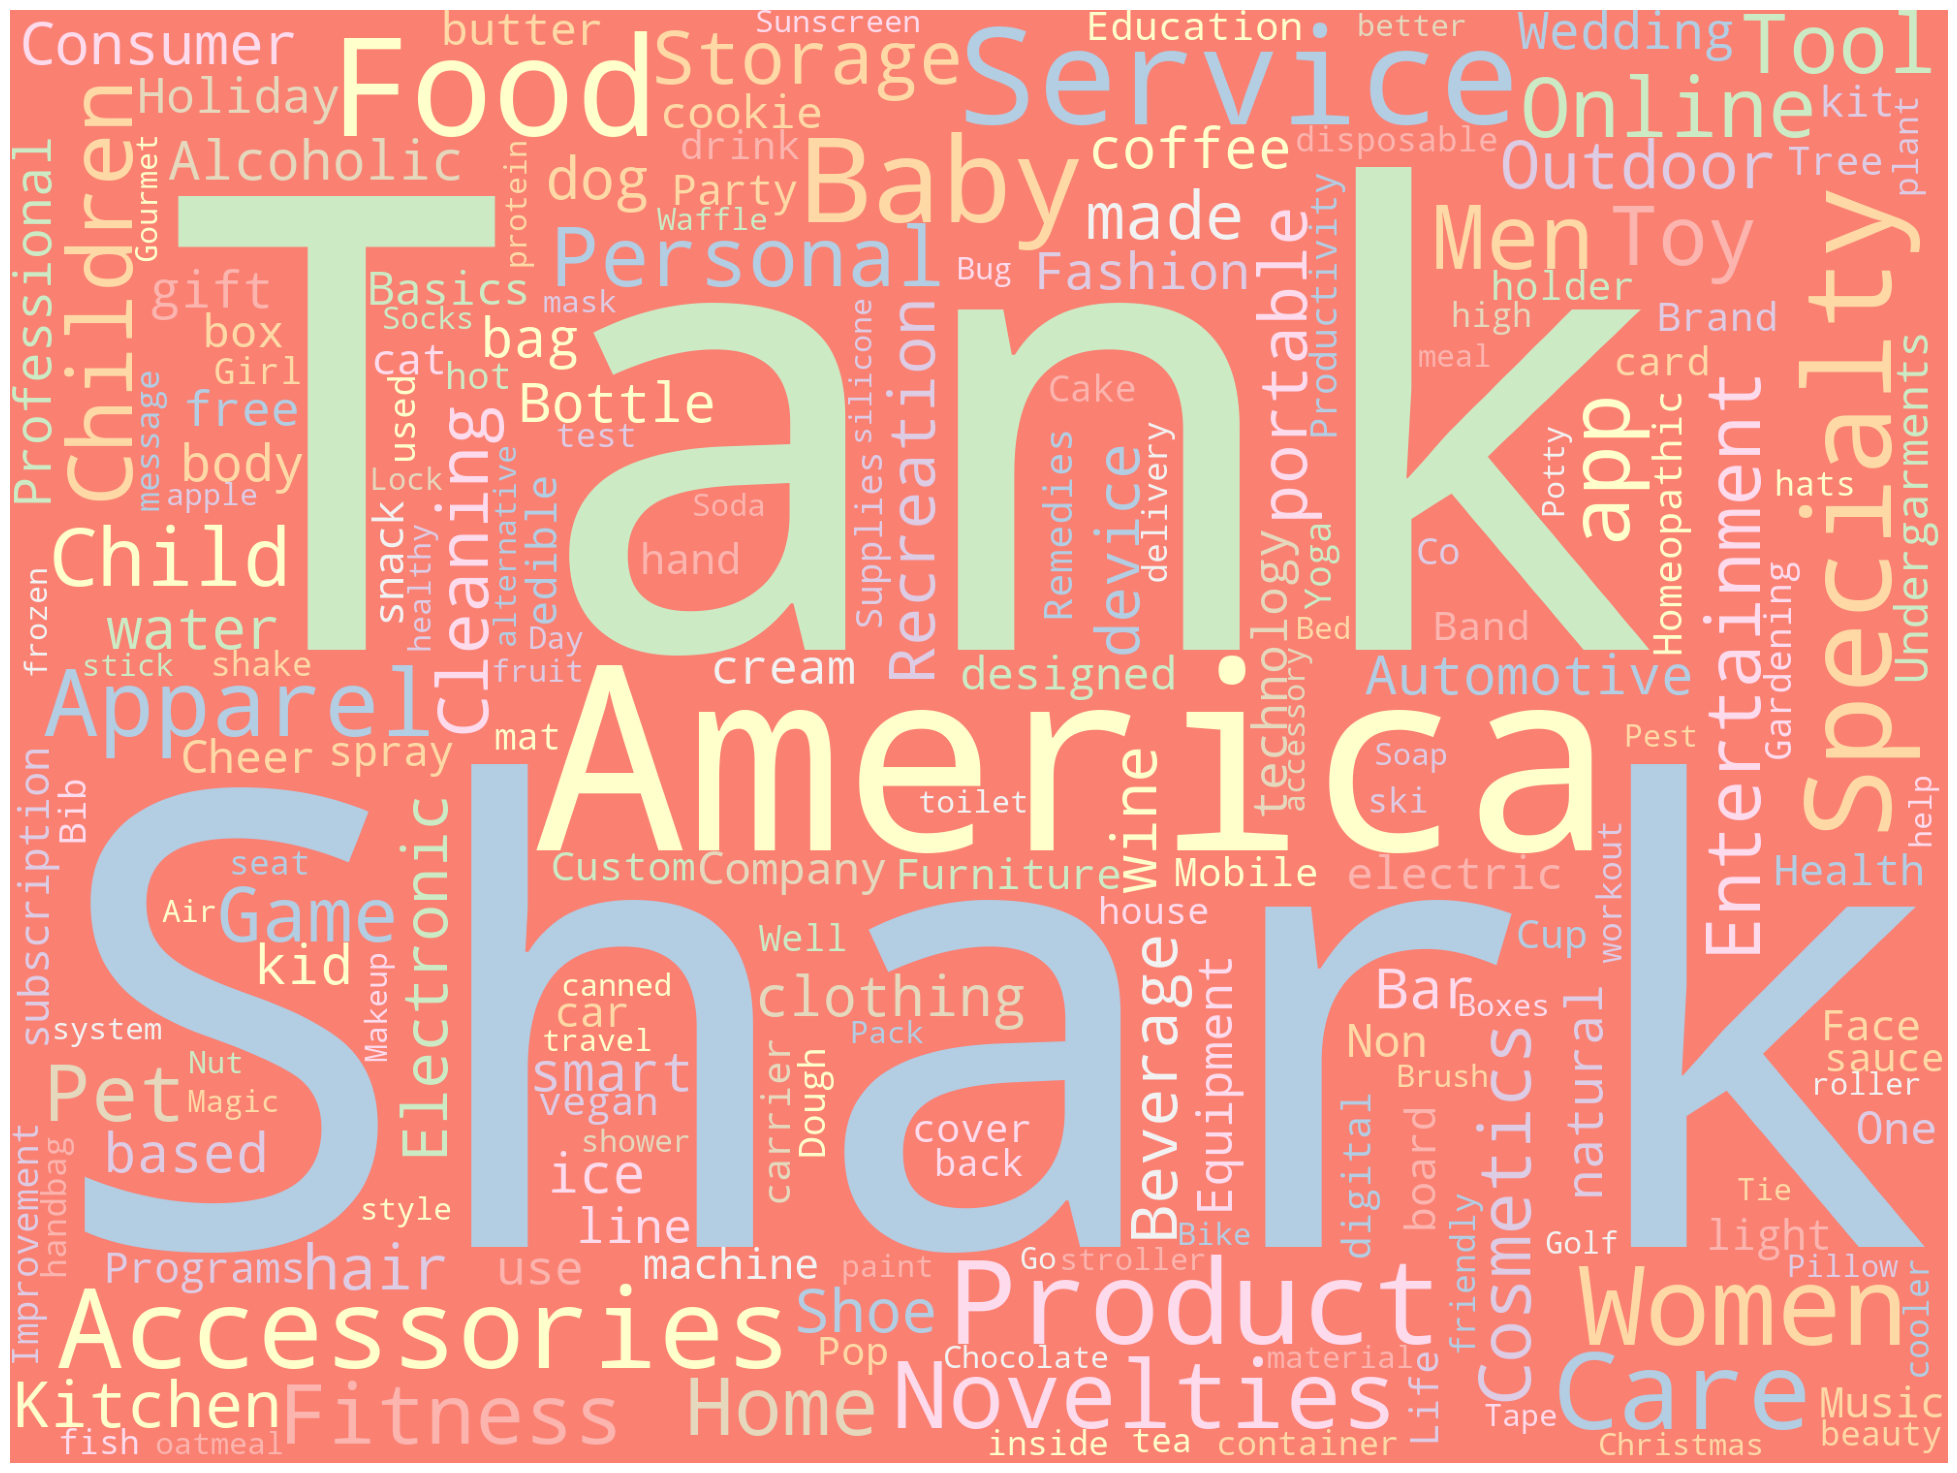

In [58]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [59]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [60]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.3
# seaborn version: 0.12.2
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.3
seaborn version: 0.12.2
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [61]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [62]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [63]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [64]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [65]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [66]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [67]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
1133             14    23-Sep-22        NaN              11          1171   

     Original Air Date    Startup Name         Industry  \
1133         13-Jan-23  Cabinet Health  Health/Wellness   

                       Business Description Pitchers Gender Pitchers City  \
1133  Accessible and sustainable healthcare            Male           NaN   

     Pitchers State Pitchers Average Age            Entrepreneur Names  \
1133            NaN               Middle  Russell Gong and Achal Patel   

     Company Website  Multiple Entrepreneurs  US Viewership  \
1133             NaN                       1           4.04   

      Original Ask Amount  Original Offered Equity  Valuation Requested  \
1133             500000.0                      2.5           20000000.0   

      Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
1133       1.0           500000.0                7.0       7142857.0   

      Number of sharks in deal  ...  Equity Per Shark  Royalty Deal  Loan  \
1133                       1.0  ...               7.0           1.0   NaN   

      Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
1133                                 NaN                                 NaN   

      Mark Cuban Investment Amount  Mark Cuban Investment Equity  \
1133                           NaN                           NaN   

      Lori Greiner Investment Amount  Lori Greiner Investment Equity  \
1133                             NaN                             NaN   

      Robert Herjavec Investment Amount  Robert Herjavec Investment Equity  \
1133                                NaN                                NaN   

      Daymond John Investment Amount  Daymond John Investment Equity  \
1133                             NaN                             NaN   

      Kevin O Leary Investment Amount  Kevin O Leary Investment Equity  \
1133                         500000.0                              7.0   

      Guest Investment Amount  Guest Investment Equity  Guest Name  \
1133                 500000.0                      7.0     Tony Xu   

     Barbara Corcoran Present  Mark Cuban Present  Lori Greiner Present  \
1133                      NaN                 NaN                   NaN   

      Robert Herjavec Present  Daymond John Present  Kevin O Leary Present  \
1133                      NaN                   NaN                    NaN   

      Total Deal Amount in M  
1133                     0.5  

[1 rows x 51 columns]

In [68]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
1133             14    23-Sep-22        NaN              11          1171   

     Original Air Date    Startup Name         Industry  \
1133         13-Jan-23  Cabinet Health  Health/Wellness   

                       Business Description Pitchers Gender Pitchers City  \
1133  Accessible and sustainable healthcare            Male           NaN   

     Pitchers State Pitchers Average Age            Entrepreneur Names  \
1133            NaN               Middle  Russell Gong and Achal Patel   

     Company Website  Multiple Entrepreneurs  US Viewership  \
1133             NaN                       1           4.04   

      Original Ask Amount  Original Offered Equity  Valuation Requested  \
1133             500000.0                      2.5           20000000.0   

      Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
1133       1.0           500000.0                7.0       7142857.0   

      Number of sharks in deal  ...  Equity Per Shark  Royalty Deal  Loan  \
1133                       1.0  ...               7.0           1.0   NaN   

      Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
1133                                 NaN                                 NaN   

      Mark Cuban Investment Amount  Mark Cuban Investment Equity  \
1133                           NaN                           NaN   

      Lori Greiner Investment Amount  Lori Greiner Investment Equity  \
1133                             NaN                             NaN   

      Robert Herjavec Investment Amount  Robert Herjavec Investment Equity  \
1133                                NaN                                NaN   

      Daymond John Investment Amount  Daymond John Investment Equity  \
1133                             NaN                             NaN   

      Kevin O Leary Investment Amount  Kevin O Leary Investment Equity  \
1133                         500000.0                              7.0   

      Guest Investment Amount  Guest Investment Equity  Guest Name  \
1133                 500000.0                      7.0     Tony Xu   

     Barbara Corcoran Present  Mark Cuban Present  Lori Greiner Present  \
1133                      NaN                 NaN                   NaN   

      Robert Herjavec Present  Daymond John Present  Kevin O Leary Present  \
1133                      NaN                   NaN                    NaN   

      Total Deal Amount in M  
1133                     0.5  

[1 rows x 51 columns]

In [69]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [70]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [71]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 0) & (shark_tank['Entrepreneur Names'].notnull() & shark_tank['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [72]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 1) & (shark_tank['Entrepreneur Names'].str.contains(' and ')==False)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
1046             12    16-Oct-20  21-May-21              14          1047   

     Original Air Date  Startup Name           Industry Business Description  \
1046         19-Feb-21  Sienna Sauce  Food and Beverage           Wing sauce   

     Pitchers Gender Pitchers City Pitchers State Pitchers Average Age  \
1046          Female           NaN            NaN                Young   

       Entrepreneur Names Company Website  Multiple Entrepreneurs  \
1046  Tyla-Simone Crayton             NaN                       1   

      US Viewership  Original Ask Amount  Original Offered Equity  \
1046           4.64             100000.0                     10.0   

      Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
1046            1000000.0       1.0           100000.0               20.0   

      Deal Valuation  Number of sharks in deal  ...  Equity Per Shark  \
1046        500000.0                       1.0  ...              20.0   

      Royalty Deal  Loan  Barbara Corcoran Investment Amount  \
1046           NaN   NaN                                 NaN   

      Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
1046                                 NaN                           NaN   

      Mark Cuban Investment Equity  Lori Greiner Investment Amount  \
1046                           NaN                             NaN   

      Lori Greiner Investment Equity  Robert Herjavec Investment Amount  \
1046                             NaN                                NaN   

      Robert Herjavec Investment Equity  Daymond John Investment Amount  \
1046                                NaN                             NaN   

      Daymond John Investment Equity  Kevin O Leary Investment Amount  \
1046                             NaN                              NaN   

      Kevin O Leary Investment Equity  Guest Investment Amount  \
1046                              NaN                 100000.0   

      Guest Investment Equity    Guest Name Barbara Corcoran Present  \
1046                     20.0  Kendra Scott                      NaN   

      Mark Cuban Present  Lori Greiner Present  Robert Herjavec Present  \
1046                 NaN                   NaN                      NaN   

      Daymond John Present  Kevin O Leary Present  Total Deal Amount in M  
1046                   NaN                    NaN                     0.1  

[1 rows x 51 columns]

In [73]:
shark_tank.loc[(shark_tank['Got Deal'] != 0) & (shark_tank['Got Deal'] != 1)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
1119             14    23-Sep-22        NaN               8          1157   

     Original Air Date  Startup Name Industry Business Description  \
1119         02-Dec-22  FireFighter1      nan                  nan   

     Pitchers Gender Pitchers City Pitchers State Pitchers Average Age  \
1119          Female           NaN            NaN               Middle   

     Entrepreneur Names Company Website  Multiple Entrepreneurs  \
1119                NaN             NaN                       0   

      US Viewership  Original Ask Amount  Original Offered Equity  \
1119           3.46                  NaN                      NaN   

      Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
1119                  NaN       NaN                NaN                NaN   

      Deal Valuation  Number of sharks in deal  ...  Equity Per Shark  \
1119             NaN                       NaN  ...               NaN   

      Royalty Deal  Loan  Barbara Corcoran Investment Amount  \
1119           NaN   NaN                                 NaN   

      Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
1119                                 NaN                           NaN   

      Mark Cuban Investment Equity  Lori Greiner Investment Amount  \
1119                           NaN                             NaN   

      Lori Greiner Investment Equity  Robert Herjavec Investment Amount  \
1119                             NaN                                NaN   

      Robert Herjavec Investment Equity  Daymond John Investment Amount  \
1119                                NaN                             NaN   

      Daymond John Investment Equity  Kevin O Leary Investment Amount  \
1119                             NaN                              NaN   

      Kevin O Leary Investment Equity  Guest Investment Amount  \
1119                              NaN                      NaN   

      Guest Investment Equity  Guest Name Barbara Corcoran Present  \
1119                      NaN         NaN                      NaN   

      Mark Cuban Present  Lori Greiner Present  Robert Herjavec Present  \
1119                 NaN                   NaN                      NaN   

      Daymond John Present  Kevin O Leary Present  Total Deal Amount in M  
1119                   NaN                    NaN                     NaN  

[1 rows x 51 columns]

In [74]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [75]:
shark_tank.loc[(shark_tank['Pitchers Gender'] == 'Mixed Team') & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]